In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta
import plotly.graph_objs as go
from tabulate import tabulate

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


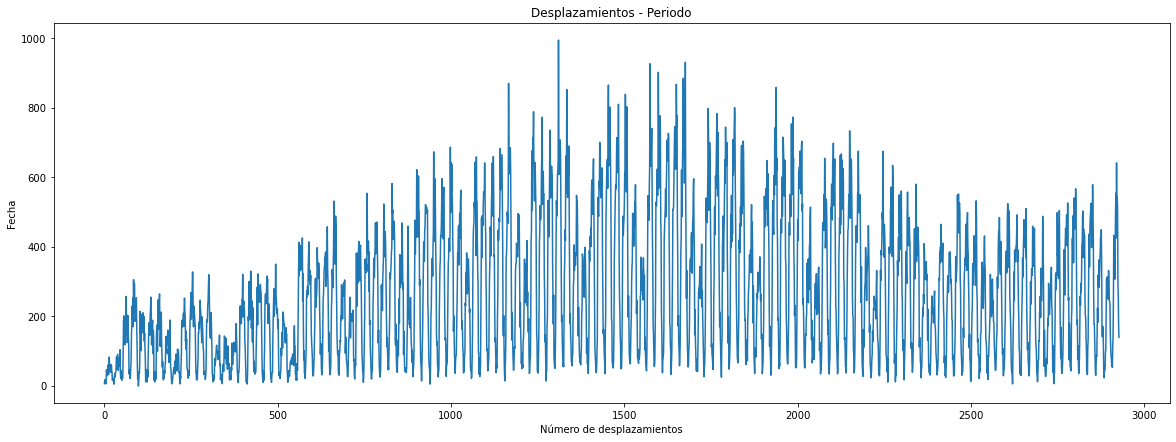

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)

def est_Viernes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)

def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)


##############################################Train########################################################

def Regressor1AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 1:                 
        mean = Train1AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor2AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 2:                 
        mean = Train2AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor3AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 3:                 
        mean = Train3AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor4AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 4:                 
        mean = Train4AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor5AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 5:                 
        mean = Train5AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor6AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 6:                 
        mean = Train6AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor7AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 7:                 
        mean = Train7AM_N.y.mean()
        valor = mean         
    else:
        valor = 0    
    return (valor)

def Regressor8AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 8:                 
        mean = Train8AM_N.y.mean()
        valor = mean                
    else:
        valor = 0    
    return (valor)

def Regressor9AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 9:                 
        mean = Train9AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor10AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 10:                 
        mean = Train10AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor11AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 11:                 
        mean = Train11AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor12PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 12:                 
        mean = Train12PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor13PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 13:                 
        mean = Train13PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor14PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 14:                 
        mean = Train14PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor15PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 15:                 
        mean = Train15PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor16PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 16:                 
        mean = Train16PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor17PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 17:                 
        mean = Train17PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor18PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 18:                 
        mean = Train18PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor19PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 19:                 
        mean = Train19PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor20PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 20:                 
        mean = Train20PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor21PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 21:                 
        mean = Train21PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor22PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 22:                 
        mean = Train22PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor23PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 23:                 
        mean = Train23PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor24AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 0:                 
        mean = Train24AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)


PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)

PeriodoDesescalada['Lunes'] = PeriodoDesescalada['ds'].apply(est_Lunes)
PeriodoNnormalidad['Lunes'] = PeriodoNnormalidad['ds'].apply(est_Lunes)
PeriodoDesescalada['Viernes'] = PeriodoDesescalada['ds'].apply(est_Viernes)
PeriodoNnormalidad['Viernes'] = PeriodoNnormalidad['ds'].apply(est_Viernes)
 

PeriodoDesescalada['Lunes2AM'] = PeriodoDesescalada['ds'].apply(est_Lunes2AM)
PeriodoNnormalidad['Lunes2AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes2AM)

PeriodoDesescalada['Lunes3AM'] = PeriodoDesescalada['ds'].apply(est_Lunes3AM)
PeriodoNnormalidad['Lunes3AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes3AM)

PeriodoDesescalada['Lunes4AM'] = PeriodoDesescalada['ds'].apply(est_Lunes4AM)
PeriodoNnormalidad['Lunes4AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes4AM)

PeriodoDesescalada['Lunes5AM'] = PeriodoDesescalada['ds'].apply(est_Lunes5AM)
PeriodoNnormalidad['Lunes5AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes5AM)

PeriodoDesescalada['Lunes6AM'] = PeriodoDesescalada['ds'].apply(est_Lunes6AM)
PeriodoNnormalidad['Lunes6AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes6AM)

PeriodoDesescalada['Lunes7AM'] = PeriodoDesescalada['ds'].apply(est_Lunes7AM)
PeriodoNnormalidad['Lunes7AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes7AM)

PeriodoDesescalada['Lunes8AM'] = PeriodoDesescalada['ds'].apply(est_Lunes8AM)
PeriodoNnormalidad['Lunes8AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes8AM)

PeriodoDesescalada['Lunes9AM'] = PeriodoDesescalada['ds'].apply(est_Lunes9AM)
PeriodoNnormalidad['Lunes9AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes9AM)

PeriodoDesescalada['Lunes10AM'] = PeriodoDesescalada['ds'].apply(est_Lunes10AM)
PeriodoNnormalidad['Lunes10AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes10AM)

PeriodoDesescalada['Lunes11AM'] = PeriodoDesescalada['ds'].apply(est_Lunes11AM)
PeriodoNnormalidad['Lunes11AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes11AM)

PeriodoDesescalada['Lunes12PM'] = PeriodoDesescalada['ds'].apply(est_Lunes12PM)
PeriodoNnormalidad['Lunes12PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes12PM)

PeriodoDesescalada['Lunes13PM'] = PeriodoDesescalada['ds'].apply(est_Lunes13PM)
PeriodoNnormalidad['Lunes13PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes13PM)

PeriodoDesescalada['Lunes14PM'] = PeriodoDesescalada['ds'].apply(est_Lunes14PM)
PeriodoNnormalidad['Lunes14PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes14PM)

PeriodoDesescalada['Lunes15PM'] = PeriodoDesescalada['ds'].apply(est_Lunes15PM)
PeriodoNnormalidad['Lunes15PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes15PM)

PeriodoDesescalada['Lunes16PM'] = PeriodoDesescalada['ds'].apply(est_Lunes16PM)
PeriodoNnormalidad['Lunes16PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes16PM)

PeriodoDesescalada['Lunes17PM'] = PeriodoDesescalada['ds'].apply(est_Lunes17PM)
PeriodoNnormalidad['Lunes17PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes17PM)

PeriodoDesescalada['Lunes18PM'] = PeriodoDesescalada['ds'].apply(est_Lunes18PM)
PeriodoNnormalidad['Lunes18PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes18PM)

PeriodoDesescalada['Lunes19PM'] = PeriodoDesescalada['ds'].apply(est_Lunes19PM)
PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)

PeriodoDesescalada['Lunes20PM'] = PeriodoDesescalada['ds'].apply(est_Lunes20PM)
PeriodoNnormalidad['Lunes20PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes20PM)

PeriodoDesescalada['Lunes21PM'] = PeriodoDesescalada['ds'].apply(est_Lunes21PM)
PeriodoNnormalidad['Lunes21PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes21PM)

PeriodoDesescalada['Lunes22PM'] = PeriodoDesescalada['ds'].apply(est_Lunes22PM)
PeriodoNnormalidad['Lunes22PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes22PM)

PeriodoDesescalada['Lunes23PM'] = PeriodoDesescalada['ds'].apply(est_Lunes23PM)
PeriodoNnormalidad['Lunes23PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes23PM)

PeriodoDesescalada['Lunes24AM'] = PeriodoDesescalada['ds'].apply(est_Lunes24AM)
PeriodoNnormalidad['Lunes24AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes24AM)


/tmp/ipykernel_8210/3938361056.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_8210/3938361056.py:350: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_8210/3938361056.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_8210/3938361056.py:389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes12PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes12PM)
/tmp/ipykernel_8210/3938361056.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes13PM'] = PeriodoDesescalada['ds'].apply(est_Lunes13PM)
/tmp/ipykernel_8210/3938361056.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [10]:
# PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
#PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [11]:
# #Desescalada
# train_end_D = datetime.datetime(2020,6,7,23,0,0)
# test_end_D = datetime.datetime(2020,6,8,23,0,0)

# train_data_D = PeriodoDesescalada[:train_end_D]
# test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

# #Nueva Normalidad
# train_end_N = datetime.datetime(2020,8,30,23,0,0)
# test_end_N = datetime.datetime(2020,8,31,23,0,0)
# # train_end_N = datetime.datetime(2020,8,23,23,0,0)
# # test_end_N = datetime.datetime(2020,8,24,23,0,0)
# # train_end_N = datetime.datetime(2020,8,16,23,0,0)
# # test_end_N = datetime.datetime(2020,8,17,23,0,0)

# train_data_N = PeriodoNnormalidad[:train_end_N]
# test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [12]:
# train_data_D = train_data_D.reset_index()
# train_data_N = train_data_N.reset_index()

# test_data_D = test_data_D.reset_index()
# test_data_N = test_data_N.reset_index()

# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento


In [13]:
##################PeriodoNnormalidad######################
mask1AM_N = (PeriodoNnormalidad['Lunes1AM'] == True)
mask2AM_N = (PeriodoNnormalidad['Lunes2AM'] == True)
mask3AM_N = (PeriodoNnormalidad['Lunes3AM'] == True)
mask4AM_N = (PeriodoNnormalidad['Lunes4AM'] == True)
mask5AM_N = (PeriodoNnormalidad['Lunes5AM'] == True)
mask6AM_N = (PeriodoNnormalidad['Lunes6AM'] == True)
mask7AM_N = (PeriodoNnormalidad['Lunes7AM'] == True)
mask8AM_N = (PeriodoNnormalidad['Lunes8AM'] == True)
mask9AM_N = (PeriodoNnormalidad['Lunes9AM'] == True)
mask10AM_N = (PeriodoNnormalidad['Lunes10AM'] == True)
mask11AM_N = (PeriodoNnormalidad['Lunes11AM'] == True)
mask12PM_N = (PeriodoNnormalidad['Lunes12PM'] == True)
mask13PM_N = (PeriodoNnormalidad['Lunes13PM'] == True)
mask14PM_N = (PeriodoNnormalidad['Lunes14PM'] == True)
mask15PM_N = (PeriodoNnormalidad['Lunes15PM'] == True)
mask16PM_N = (PeriodoNnormalidad['Lunes16PM'] == True)
mask17PM_N = (PeriodoNnormalidad['Lunes17PM'] == True)
mask18PM_N = (PeriodoNnormalidad['Lunes18PM'] == True)
mask19PM_N = (PeriodoNnormalidad['Lunes19PM'] == True)
mask20PM_N = (PeriodoNnormalidad['Lunes20PM'] == True)
mask21PM_N = (PeriodoNnormalidad['Lunes21PM'] == True)
mask22PM_N = (PeriodoNnormalidad['Lunes22PM'] == True)
mask23PM_N = (PeriodoNnormalidad['Lunes23PM'] == True)
mask24AM_N = (PeriodoNnormalidad['Lunes24AM'] == True)

Train1AM_N = PeriodoNnormalidad.loc[mask1AM_N]
Train2AM_N = PeriodoNnormalidad.loc[mask2AM_N]
Train3AM_N = PeriodoNnormalidad.loc[mask3AM_N]
Train4AM_N = PeriodoNnormalidad.loc[mask4AM_N]
Train5AM_N = PeriodoNnormalidad.loc[mask5AM_N]
Train6AM_N = PeriodoNnormalidad.loc[mask6AM_N]
Train7AM_N = PeriodoNnormalidad.loc[mask7AM_N]
Train8AM_N = PeriodoNnormalidad.loc[mask8AM_N]
Train9AM_N = PeriodoNnormalidad.loc[mask9AM_N]
Train10AM_N = PeriodoNnormalidad.loc[mask10AM_N]
Train11AM_N = PeriodoNnormalidad.loc[mask11AM_N]
Train12PM_N = PeriodoNnormalidad.loc[mask12PM_N]
Train13PM_N = PeriodoNnormalidad.loc[mask13PM_N]
Train14PM_N = PeriodoNnormalidad.loc[mask14PM_N]
Train15PM_N = PeriodoNnormalidad.loc[mask15PM_N]
Train16PM_N = PeriodoNnormalidad.loc[mask16PM_N]
Train17PM_N = PeriodoNnormalidad.loc[mask17PM_N]
Train18PM_N = PeriodoNnormalidad.loc[mask18PM_N]
Train19PM_N = PeriodoNnormalidad.loc[mask19PM_N]
Train20PM_N = PeriodoNnormalidad.loc[mask20PM_N]
Train21PM_N = PeriodoNnormalidad.loc[mask21PM_N]
Train22PM_N = PeriodoNnormalidad.loc[mask22PM_N]
Train23PM_N = PeriodoNnormalidad.loc[mask23PM_N]
Train24AM_N = PeriodoNnormalidad.loc[mask24AM_N]

In [14]:
maskLunes = (PeriodoNnormalidad['Lunes'] == True)
PatronLunes = PeriodoNnormalidad.loc[maskLunes]
maskViernes = (PeriodoNnormalidad['Viernes'] == True)
PatronViernes = PeriodoNnormalidad.loc[maskViernes]

In [15]:
Train8AM_N = Train8AM_N.reset_index()
start8AM_N = Train8AM_N.iloc[0]['ds']
end8AM_N = Train8AM_N.iloc[-1]['ds'] 
N_Dias = pd.date_range(start8AM_N, end8AM_N, freq='D')
print(len(N_Dias))
print(N_Dias)

78
DatetimeIndex(['2020-06-15 08:00:00', '2020-06-16 08:00:00',
               '2020-06-17 08:00:00', '2020-06-18 08:00:00',
               '2020-06-19 08:00:00', '2020-06-20 08:00:00',
               '2020-06-21 08:00:00', '2020-06-22 08:00:00',
               '2020-06-23 08:00:00', '2020-06-24 08:00:00',
               '2020-06-25 08:00:00', '2020-06-26 08:00:00',
               '2020-06-27 08:00:00', '2020-06-28 08:00:00',
               '2020-06-29 08:00:00', '2020-06-30 08:00:00',
               '2020-07-01 08:00:00', '2020-07-02 08:00:00',
               '2020-07-03 08:00:00', '2020-07-04 08:00:00',
               '2020-07-05 08:00:00', '2020-07-06 08:00:00',
               '2020-07-07 08:00:00', '2020-07-08 08:00:00',
               '2020-07-09 08:00:00', '2020-07-10 08:00:00',
               '2020-07-11 08:00:00', '2020-07-12 08:00:00',
               '2020-07-13 08:00:00', '2020-07-14 08:00:00',
               '2020-07-15 08:00:00', '2020-07-16 08:00:00',
               '2020-

In [16]:
#Entrenamiento

PeriodoNnormalidad['Patron1AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor1AMTrain)
PeriodoNnormalidad['Patron2AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor2AMTrain)
PeriodoNnormalidad['Patron3AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor3AMTrain)
PeriodoNnormalidad['Patron4AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor4AMTrain)
PeriodoNnormalidad['Patron5AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor5AMTrain)
PeriodoNnormalidad['Patron6AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor6AMTrain)
PeriodoNnormalidad['Patron7AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor7AMTrain)
PeriodoNnormalidad['Patron8AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor8AMTrain)
PeriodoNnormalidad['Patron9AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor9AMTrain)
PeriodoNnormalidad['Patron10AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor10AMTrain)
PeriodoNnormalidad['Patron11AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor11AMTrain)
PeriodoNnormalidad['Patron12PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor12PMTrain)
PeriodoNnormalidad['Patron13PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor13PMTrain)
PeriodoNnormalidad['Patron14PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor14PMTrain)
PeriodoNnormalidad['Patron15PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor15PMTrain)
PeriodoNnormalidad['Patron16PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor16PMTrain)
PeriodoNnormalidad['Patron17PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor17PMTrain)
PeriodoNnormalidad['Patron18PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor18PMTrain)
PeriodoNnormalidad['Patron19PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor19PMTrain)
PeriodoNnormalidad['Patron20PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor20PMTrain)
PeriodoNnormalidad['Patron21PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor21PMTrain)
PeriodoNnormalidad['Patron22PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor22PMTrain)
PeriodoNnormalidad['Patron23PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor23PMTrain)
PeriodoNnormalidad['Patron24AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor24AMTrain)

#####################################Test#####################################
# test_data_N['Patron1AM_N'] = test_data_N['ds'].apply(Regressor1AMTrain)
# test_data_N['Patron2AM_N'] = test_data_N['ds'].apply(Regressor2AMTrain)
# test_data_N['Patron3AM_N'] = test_data_N['ds'].apply(Regressor3AMTrain)
# test_data_N['Patron4AM_N'] = test_data_N['ds'].apply(Regressor4AMTrain)
# test_data_N['Patron5AM_N'] = test_data_N['ds'].apply(Regressor5AMTrain)
# test_data_N['Patron6AM_N'] = test_data_N['ds'].apply(Regressor6AMTrain)
# test_data_N['Patron7AM_N'] = test_data_N['ds'].apply(Regressor7AMTrain)
# test_data_N['Patron8AM_N'] = test_data_N['ds'].apply(Regressor8AMTrain)
# test_data_N['Patron9AM_N'] = test_data_N['ds'].apply(Regressor9AMTrain)
# test_data_N['Patron10AM_N'] = test_data_N['ds'].apply(Regressor10AMTrain)
# test_data_N['Patron11AM_N'] = test_data_N['ds'].apply(Regressor11AMTrain)
# test_data_N['Patron12PM_N'] = test_data_N['ds'].apply(Regressor12PMTrain)
# test_data_N['Patron13PM_N'] = test_data_N['ds'].apply(Regressor13PMTrain)
# test_data_N['Patron14PM_N'] = test_data_N['ds'].apply(Regressor14PMTrain)
# test_data_N['Patron15PM_N'] = test_data_N['ds'].apply(Regressor15PMTrain)
# test_data_N['Patron16PM_N'] = test_data_N['ds'].apply(Regressor16PMTrain)
# test_data_N['Patron17PM_N'] = test_data_N['ds'].apply(Regressor17PMTrain)
# test_data_N['Patron18PM_N'] = test_data_N['ds'].apply(Regressor18PMTrain)
# test_data_N['Patron19PM_N'] = test_data_N['ds'].apply(Regressor19PMTrain)
# test_data_N['Patron20PM_N'] = test_data_N['ds'].apply(Regressor20PMTrain)
# test_data_N['Patron21PM_N'] = test_data_N['ds'].apply(Regressor21PMTrain)
# test_data_N['Patron22PM_N'] = test_data_N['ds'].apply(Regressor22PMTrain)
# test_data_N['Patron23PM_N'] = test_data_N['ds'].apply(Regressor23PMTrain)
# test_data_N['Patron24AM_N'] = test_data_N['ds'].apply(Regressor24AMTrain)

/tmp/ipykernel_8210/3539656384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Patron1AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor1AMTrain)
/tmp/ipykernel_8210/3539656384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Patron2AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor2AMTrain)
/tmp/ipykernel_8210/3539656384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

/tmp/ipykernel_8210/3539656384.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Patron23PM_N'] = PeriodoNnormalidad['ds'].apply(Regressor23PMTrain)
/tmp/ipykernel_8210/3539656384.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Patron24AM_N'] = PeriodoNnormalidad['ds'].apply(Regressor24AMTrain)


In [17]:
#train_data_D.iloc[56:59]
#test_data_D.head(50)
#test_data_D.ds.iloc[0]
#Train8AM_D

# Nueva Normalidad
## Aplicamos Rolling Forecasting para evaluación del modelo
## Agregamos Regressor

In [18]:
m = Prophet(changepoint_prior_scale=0.5,weekly_seasonality=False,daily_seasonality=True,seasonality_mode='multiplicative')
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='Lunes_season', period=1, fourier_order=6, condition_name='Lunes')                
m.add_regressor('Patron1AM_N',mode='multiplicative')        
m.add_regressor('Patron2AM_N',mode='multiplicative')        
m.add_regressor('Patron3AM_N',mode='multiplicative')        
m.add_regressor('Patron4AM_N',mode='multiplicative')        
m.add_regressor('Patron5AM_N',mode='multiplicative')        
m.add_regressor('Patron6AM_N',mode='multiplicative')        
m.add_regressor('Patron7AM_N',mode='multiplicative')        
m.add_regressor('Patron8AM_N',mode='multiplicative')        
m.add_regressor('Patron9AM_N',mode='multiplicative')        
m.add_regressor('Patron10AM_N',mode='multiplicative')        
m.add_regressor('Patron11AM_N',mode='multiplicative')        
m.add_regressor('Patron12PM_N',mode='multiplicative')        
m.add_regressor('Patron13PM_N',mode='multiplicative')        
m.add_regressor('Patron14PM_N',mode='multiplicative')        
m.add_regressor('Patron15PM_N',mode='multiplicative')        
m.add_regressor('Patron16PM_N',mode='multiplicative')        
m.add_regressor('Patron17PM_N',mode='multiplicative')        
m.add_regressor('Patron18PM_N',mode='multiplicative')        
m.add_regressor('Patron19PM_N',mode='multiplicative')        
m.add_regressor('Patron20PM_N',mode='multiplicative')        
m.add_regressor('Patron21PM_N',mode='multiplicative')        
m.add_regressor('Patron22PM_N',mode='multiplicative')        
m.add_regressor('Patron23PM_N',mode='multiplicative')        
m.add_regressor('Patron24AM_N',mode='multiplicative')
m.fit(PeriodoNnormalidad);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.2255
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3712.06    0.00427865       61.6685           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3728.26     0.0210638       96.0269           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3747.01      0.374413       219.959           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3761.87     0.0277781       70.8398       1.792      0.1792      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3764.78     0.0061631        63.228      0.9455      0.9455      608   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [19]:
cutoffs = pd.to_datetime(['2020-08-03 15:00:00'])
cv = cross_validation(m, cutoffs=cutoffs,horizon='1 hours') 

  0%|          | 0/1 [00:00<?, ?it/s]

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.5117
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2334.69     0.0125479       91.9376           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2354.9    0.00790369       83.0101           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2386.81      0.165948       269.093           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2423.13     0.0119686       120.222           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2434.32    0.00760387       99.3923           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


# Cross Validation

In [20]:
def getPerfomanceMetrics(m):
    return performance_metrics(getCrossValidationData(m),rolling_window=0)
def getCrossValidationData(m):
    cutoffs = pd.to_datetime(['2020-07-06 00:00:00'])
    return cross_validation(m, cutoffs=cutoffs,horizon='1 hours')    

In [21]:
df_p = getPerfomanceMetrics(m)#.mean()

  0%|          | 0/1 [00:00<?, ?it/s]

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.8823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1270.57     0.0050952       145.229      0.6638      0.6638      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1296.16    0.00623637       184.007      0.5156     0.05156      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1313.14    0.00710887       62.5948           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1318.14     0.0107765       182.395      0.7239      0.7239      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1320.14    0.00173596       116.151      0.6151      0.6151      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [22]:
df_p.head(50)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 01:00:00,679.019413,26.058001,26.058001,0.280888,0.280888,0.326783,1.0


In [23]:
import itertools
param_grid = {  
    'fecha': ['2020-07-06','2020-07-20','2020-08-03','2020-08-17','2020-08-31'],
    'hora': ['00:00:00','01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00','07:00:00','08:00:00',
             '09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00',
             '18:00:00','19:00:00','20:00:00','21:00:00','22:00:00'],
}

# Generate all combinations of parameters
cont = 0
for fecha in param_grid['fecha']:    
    if cont==0:
        Fechas = pd.date_range(start=fecha, periods=24, freq='H')
    else:
        Fecha_Range = pd.date_range(start=fecha, periods=24, freq='H')
        Fechas = Fechas.append(Fecha_Range)
    cont += 1

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
MAPEs = []  # Store the MAPEs for each params here
cutoff24_1 = {'fecha': '2020-07-05', 'hora': '23:00:00'}# tenía error en el mes (08)
cutoff24_2 = {'fecha': '2020-07-19', 'hora': '23:00:00'}# tenía error en el mes (08)
cutoff24_3 = {'fecha': '2020-08-02', 'hora': '23:00:00'}
cutoff24_4 = {'fecha': '2020-08-16', 'hora': '23:00:00'}
cutoff24_5 = {'fecha': '2020-08-30', 'hora': '23:00:00'}
all_params.insert(0, cutoff24_1)
all_params.insert(24, cutoff24_2)
all_params.insert(48, cutoff24_3)
all_params.insert(72, cutoff24_4)
all_params.insert(96, cutoff24_5)
# # Use cross validation to evaluate all parameters
for params in all_params:
    cutoff = params['fecha'] + ' ' + params['hora']
    cutoffs = pd.to_datetime([cutoff])
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='1 hours', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=0)    
    rmses.append(df_p['rmse'].values[0])
    MAPEs.append(df_p['mape'].values[0])

# # # Find the best parameters
tuning_results = pd.DataFrame(Fechas)
tuning_results['rmse'] = rmses
tuning_results['MAPE'] = MAPEs
print(tuning_results)

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d3a30>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -35.7035
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1262.47    0.00208329       143.502      0.2809      0.2809      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1287.62     0.0379731       371.389      0.5097           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1307.58     0.0113779         49.31           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1313.52     0.0102514       21.2568           1           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1317.09     0.0296028       31.3723           1           1      601   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dcd00>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.8823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1270.57     0.0050952       145.229      0.6638      0.6638      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1296.16    0.00623637       184.007      0.5156     0.05156      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1313.14    0.00710887       62.5948           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1318.14     0.0107765       182.395      0.7239      0.7239      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1320.14    0.00173596       116.151      0.6151      0.6151      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8e50>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.6429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1274.36     0.0071408       190.035      0.8876      0.8876      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1309.78     0.0358087       152.971      0.5445           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1318.16     0.0291376       62.2122           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1323.19    0.00300881        64.722      0.4148     0.04148      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1324.57     0.0179266       84.5924           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2099       1330.91   2.03018e-05       6.30729      0.2321           1     2671   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       1330.91    8.2404e-05       5.45946          10           1     2794   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2263       1330.91   3.11198e-06        5.7851      0.3554      0.3554     2875   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc070>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -39.2663
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1277.5    0.00821296       137.792           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1299.23     0.0124031       41.1687           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1311.65    0.00103921       31.1465           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1315.61    0.00646911       33.5848           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1323.41     0.0173398        44.234      0.9524      0.9524      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2257        1334.2   1.60914e-07       5.20903     0.07754           1     2885   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8400>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -40.0505
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1283.81     0.0582774       361.488           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1313.99    0.00585935       153.109           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1321.13    0.00430429        85.288           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1326.92     0.0176508       78.3311           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1330.5   0.000842921       29.0171           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    1199       1337.64    0.00208542       17.4905           1           1     1450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1279       1337.71   3.04805e-05       9.94669   3.494e-06       0.001     1593  LS failed, Hessian reset 
    1299       1337.71   3.34983e-05       7.86057           1           1     1617   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1309       1337.71   4.08431e-07       5.02718      0.3066      0.3066     1632   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc820>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.0272
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1288.58     0.0158426       59.7001           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1317.25     0.0105988       96.6839      0.9558     0.09558      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1331.9     0.0455255       38.6232           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1334.47    0.00479619       18.2172      0.3482           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1336.93   0.000847373       29.0214       1.014      0.1014      607   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2259       1345.06     1.054e-06       7.34332      0.2372           1     2929   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8640>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.6692
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1290.85     0.0368341       266.348      0.2334           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1317.33     0.0122116        46.953           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1332.66     0.0670374       65.1231           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1338.63     0.0124545       105.485      0.5816      0.5816      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1341.86   0.000801424       91.2478      0.5756      0.5756      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8b80>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.1354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1282.24     0.0428946       491.298      0.3637      0.3637      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1318.32     0.0179184       58.0554           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1337.73     0.0987081       70.8438           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1346.09      0.023568       128.917           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1348.43    0.00921426       127.014      0.1874      0.1874      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    1330       1355.69   6.41365e-07       5.55227      0.1116      0.5525     1666   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc0a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.3558
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1296.97     0.0234113       161.785       1.346      0.1346      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1328.5     0.0159251       143.692           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1340.35    0.00602595       55.1827           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1346.49    0.00841848        26.663           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1349.75     0.0101562       60.2392       0.653       0.653      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d87c0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.3398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1285.99     0.0196596       95.8251           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1329.02      0.038992       163.086      0.1201           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1340.8     0.0150569       97.7221           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1350.46     0.0221519       34.7107           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1353.85     0.0295397       154.256           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2699       1364.57   0.000230386       15.9669      0.1269      0.4456     3705   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       1364.61   3.26765e-05       6.85198      0.2291           1     3839   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2859       1364.61   6.93528e-07       7.06447       0.308           1     3917   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d271100>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.9898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1294.1     0.0129343       212.642      0.2028      0.2028      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1319.96       0.15104       66.1495           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1346.4     0.0139552       224.194      0.4186           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1354.13     0.0267712       29.2231           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1358.41    0.00140541       80.6549      0.1445      0.1445      604   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3199       1371.59   1.05499e-05       6.82631           1           1     4263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3206       1371.59   1.91031e-05       8.09007   2.355e-06       0.001     4307  LS failed, Hessian reset 
    3286       1371.59    9.0615e-07       5.79959      0.2398      0.2398     4403   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc220>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.0102
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1298.66      0.016409       175.312           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1338.59     0.0315891       76.8953           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1354.58     0.0549182       76.6056           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1360.52     0.0183162       45.4503           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1364.71      0.072795       42.6566           1           1      601   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    1499       1373.31   0.000490697       7.68187      0.3515      0.3515     1862   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1595       1373.37    1.5605e-05       5.23509   2.276e-06       0.001     2017  LS failed, Hessian reset 
    1599       1373.37   2.83838e-06       7.77431       0.476       0.476     2022   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1604       1373.37   1.34813e-06       5.44193           1           1     2027   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3fa0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.7453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          1295     0.0569105       342.053           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1344.11    0.00736141       187.738      0.3165      0.3165      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1356.89    0.00608152       139.148           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1365.2    0.00374494       67.8625      0.1234      0.1234      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1369.31    0.00466879       47.8498           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2670       1382.18   2.67951e-05       5.93217   3.626e-06       0.001     3618  LS failed, Hessian reset 
    2679       1382.18   8.05731e-07       5.28848      0.7912      0.7912     3631   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8640>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.782
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1300.84     0.0163379       159.219           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1343.72    0.00493904       138.548      0.1792      0.1792      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1357.22     0.0238289       42.0484           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1365.54    0.00524839       30.3913           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1371.94    0.00508242       48.6721           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3780       1385.28   7.25941e-05       17.3155   8.864e-06       0.001     5000  LS failed, Hessian reset 
    3799       1385.28    1.0411e-05       6.21552           1           1     5026   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3815       1385.28   2.34456e-07       6.59791     0.03044      0.5253     5052   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e36a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.3675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1306.53     0.0626666       74.0777           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1349.25     0.0179053       118.216           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1363.41    0.00505462       93.5649       0.357           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1370.41    0.00884285       38.8994           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1373.86     0.0212442       32.9528      0.8568      0.8568      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2547       1387.38   5.75632e-05       6.53947   7.765e-06       0.001     3441  LS failed, Hessian reset 
    2599       1387.38    2.9077e-06       5.90343           1           1     3509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2600       1387.38   7.80017e-07       7.63453     0.06705           1     3512   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8b50>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.1018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1298.69      0.260874       678.452      0.1996           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1339.17     0.0152996       101.174           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1355.96      0.016751       64.0076           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1365.39     0.0280314       126.852      0.1991           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1366.89    0.00212486       50.6839      0.4558      0.4558      604   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3767       1385.65   1.95549e-05       9.15173   1.863e-06       0.001     5027  LS failed, Hessian reset 
    3794       1385.65   1.08856e-06       7.05381           1           1     5064   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e37f0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.1667
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1302.76     0.0135544       283.636       0.762       0.762      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1348.58     0.0112685       99.8399     0.08925           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1359.18    0.00274555       36.9829       0.543       0.543      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1367.45     0.0157589       29.1493           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1373.37     0.0526309        29.909           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2099       1381.79    0.00132388       20.5368       0.439           1     2949   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2142       1381.82   2.17536e-05       7.10143    1.98e-06       0.001     3043  LS failed, Hessian reset 
    2176       1381.82   7.67527e-05        6.8674   1.127e-05       0.001     3127  LS failed, Hessian reset 
    2199       1381.82   4.78645e-07       6.34779      0.1831           1     3159   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8d90>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -24.1025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1306.48     0.0647459       157.788           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1341.69     0.0239758        158.04           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1361.57     0.0930924       203.298           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1368.92    0.00141043       114.473       0.246       0.246      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1372.16    0.00801685       163.626           1           1      600   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2399       1382.67    0.00238791       8.03279           1           1     3156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2421       1382.67   1.35915e-06       5.98268      0.3742      0.3742     3187   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3130>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.3317
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1279.68     0.0340063       317.339      0.4516           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1342.76      0.137768       160.952           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1361.85      0.011833        68.398      0.4972      0.4972      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1369.15     0.0141131       54.6249           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1371.71    0.00737789       32.1676           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2592       1383.43   3.32408e-05       8.29965   6.187e-06       0.001     3433  LS failed, Hessian reset 
    2599       1383.43   8.67443e-06       8.98284      0.4352      0.1031     3444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2619       1383.43   1.16597e-06       4.82434      0.3847      0.3847     3470   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8850>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.2613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1291.06     0.0482188       193.406        1.34       0.134      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1350.39    0.00564624       44.9804           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1363.61     0.0141435        58.679           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1370.98     0.0216769       88.3254           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1372.51     0.0219702        37.831           1           1      599   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3199       1384.58    4.7429e-05       5.05365           1           1     4256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3230       1384.58   1.13959e-06       5.85804      0.2705      0.2705     4298   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e37c0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.1593
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1313.97     0.0112704        401.05      0.6191      0.6191      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1355.22      0.011696       51.6859           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1364.32     0.0140066       137.342      0.1554           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1371.08     0.0167817       124.434           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1376.54     0.0104971       113.754      0.2275      0.8602      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    1899       1382.89   0.000115715        11.285           1           1     2541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1943       1382.91   0.000110788       21.7239   1.073e-05       0.001     2634  LS failed, Hessian reset 
    1958       1382.91    1.1364e-05       6.14629    2.52e-06       0.001     2693  LS failed, Hessian reset 
    1971       1382.91   1.74607e-06       5.52388   4.231e-07       0.001     2753  LS failed, Hessian reset 
    1981       1382.91   8.23811e-07       4.59665      0.1933           1     2769   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d3700>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.8646
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1314.9     0.0103383       129.369           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1345.34      0.015026       37.7521           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1368.18   0.000703572       22.6875           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1372.01     0.0262246       62.4457           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1375.8     0.0180408       127.335           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    1943       1383.92   2.93875e-05       9.80086   2.119e-06       0.001     2611  LS failed, Hessian reset 
    1986       1383.93   0.000180059       20.9513   1.689e-05       0.001     2697  LS failed, Hessian reset 
    1999       1383.93   2.66364e-05       7.49666      0.2267      0.2267     2712   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2023       1383.93   7.86479e-07        6.8236      0.2842      0.2842     2747   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3bb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.3874
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1310.93     0.0835474        483.58           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1351.9     0.0210318       176.848           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1366.64     0.0100096       39.5981           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1376.74    0.00115754       19.8002           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1379.27     0.0374084       24.7596           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dcd00>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.5488
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1328.45     0.0351565       120.625       1.778      0.1778      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1358.59    0.00558589       51.6008           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1374.96    0.00895683       112.171      0.6893     0.06893      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1378.99     0.0231868       48.0039           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1381.51     0.0255914       132.037           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3730>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.6782
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1748.14     0.0469002       854.741      0.3437      0.3437      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1812.63     0.0353691       238.293           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1820.47    0.00458299       103.343           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1825.3    0.00570384       56.0846           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1828.19    0.00296591        32.943           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8a60>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.5284
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1763.52      0.287989       249.459           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1816.22    0.00603688       72.2388      0.4661      0.4661      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1824.08    0.00436647       29.6494           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1831.01    0.00339198       21.7659      0.1759           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1833.28    0.00982741       61.1914      0.9701      0.9701      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2299       1838.58   0.000343848       4.63163      0.4912      0.4912     3017   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2304       1838.58    9.4163e-07       3.55137    0.009672      0.1045     3031   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dca00>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -52.228
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1735.81     0.0797216       182.592           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1797.33    0.00776745        134.42      0.6874      0.6874      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1821.77     0.0241579       89.6442      0.7671      0.7671      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1829.08    0.00851366       40.0353           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1833.76     0.0127071       23.7243           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3dc0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.4014
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1739.22    0.00559627       236.448      0.3954           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1787.58      0.167945       110.435           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1822.04     0.0243805       83.6939           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1830.49     0.0103852       48.0098      0.6376      0.6376      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1833.06      0.026939       71.6176           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc040>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8282
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1745.7     0.0192078       459.275           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1817.17     0.0427285       156.219           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1827.78    0.00336315       152.429      0.4001      0.4001      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1832.19    0.00514308       34.1503           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1838.02     0.0313515       103.512           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2d30>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.0764
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1743.57     0.0146778       86.2392           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1821.36     0.0190663       88.5423           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1835.35     0.0463537       87.5505           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1839.44     0.0283449       70.0152           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1842.66     0.0111861       94.7662           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    1952       1851.08   6.15313e-06       3.87187   1.461e-06       0.001     2487  LS failed, Hessian reset 
    1954       1851.08   2.11619e-06       3.39915      0.6081           1     2490   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3e20>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.098
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1755.13     0.0244233       159.339      0.4918           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1827.41     0.0314798       37.0141           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1834.29     0.0158972       55.2413      0.6025      0.6025      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1841.64    0.00216792       34.1901      0.2466           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1845.28     0.0145248       37.1123      0.8225      0.8225      596   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2332       1855.33   9.57321e-07       3.31617      0.2818           1     2995   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2730>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -47.7785
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1760.35     0.0540786       272.835           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1828.04     0.0219484       76.1383           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1836.35     0.0554087       302.182      0.1946           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1842.09    0.00703764       20.3799           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          1847    0.00228138       61.9502      0.3971      0.3971      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2199       1857.65   0.000689865       13.6658      0.4337           1     2722   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2214       1857.66   2.74541e-05       4.17637      0.2387           1     2741   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8070>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -35.259
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1806.71      0.126741       141.382           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1831.49    0.00326024       51.1054      0.3718           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1840.93     0.0132791       29.6234           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1844.99     0.0229557       42.2163      0.1266      0.9491      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1848.35     0.0211009       45.1504           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2456        1859.6   2.97151e-05       7.78638   5.383e-06       0.001     3183  LS failed, Hessian reset 
    2463        1859.6    2.8737e-07       3.09116     0.02665           1     3195   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde26a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.2152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1751.27    0.00883339       406.817      0.1244           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1832.14     0.0646212       88.7553           1           1      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1839.36      0.134067       161.051           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1846.76     0.0027885       151.764     0.02045           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1851.93     0.0221089       43.1984           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2299        1861.6    0.00152407       16.5963           1           1     2854   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2310        1861.6   4.48335e-05       9.68209   1.125e-05       0.001     2899  LS failed, Hessian reset 
    2342        1861.6   1.89711e-06       4.98215      0.7056      0.1768     2944   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8640>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.8309
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          1762     0.0158373       86.8214      0.2479      0.2479      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1832.51     0.0582816       375.772      0.4555           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1840.12     0.0695129       297.785           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1848.25    0.00711271        106.32           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1851.62     0.0135918       64.6739           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2994       1866.53   2.05039e-05       6.39413    3.11e-06       0.001     4039  LS failed, Hessian reset 
    2999       1866.53    0.00012456       6.29467           1           1     4044   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3057       1866.54   3.91523e-06       3.65251       1.254      0.1254     4116   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc610>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.9241
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1782.25      0.836809       290.163           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1833.48     0.0171091       50.7553           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1841.29    0.00786743        170.87      0.3481      0.3481      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1847.63     0.0111314       37.9516           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1852.3    0.00837649       151.455      0.1857           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

    3899       1869.35   3.85549e-05       11.2036      0.2446      0.2446     5251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3999       1869.51    0.00089436       10.6224           1           1     5370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4099       1869.64    0.00729522       5.28022      0.8019      0.8019     5481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4115       1869.66   3.03806e-05        9.9604    2.19e-06       0.001     5538  LS failed, Hessian reset 
    4199       1869.71    0.00136075       18.2529           1           1     5636   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       1869.82      0.020214        13.235      0.5111           1     5761   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4364       1869.87   4.76296e-05       5.28647   1.381e-05       0.001     5984  LS failed, Hessian reset 
    4380       1869.87   9.33501e-06       3.88318    2.37e-06       0.001     6048  LS failed, Hessian reset 
    4383       1869.87   2.26949e-07       4.34764    0.007061           1     6055   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3070>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.7746
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1774.24      0.659067       311.165           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1840.41     0.0847987       155.614       1.823      0.1823      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1845.15      0.020024       52.6594           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1850.91     0.0078616       42.0652           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1856.91      0.287664       117.451           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2642       1870.02   2.07187e-05       5.36307   2.177e-06       0.001     3777  LS failed, Hessian reset 
    2678       1870.02   1.98235e-06       4.78969      0.1726       0.483     3826   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2880>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.7724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1793.88      0.141849       409.049        0.35        0.35      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1827.53     0.0536924       264.553           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1852.96    0.00532146       46.4914           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1857.37    0.00268398       30.1381           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1861.78     0.0098432       57.8109      0.4156           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4168       1880.11   0.000190153       51.0379   7.435e-06       0.001     5483  LS failed, Hessian reset 
    4199       1880.17    0.00238827       5.58528      0.9662      0.9662     5517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       1880.19   0.000502037       9.09428           1           1     5661   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       1880.21   0.000283617       3.95186           1           1     5782   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       1880.24    0.00320439       10.1777      0.3928           1     5915   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       1880.32   0.000765573       10.3183      0.2445      0.9228     6041   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4999       1880.71    0.00648979       21.1329      0.6222           1     6514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5013       1880.71   2.04623e-05       8.60988   2.576e-06       0.001     6572  LS failed, Hessian reset 
    5059       1880.72   1.49137e-08       4.70928   0.0004562      0.4223     6639   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e34f0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.6607
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1777.51      0.324191       646.347           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1836.04    0.00471886       65.4937           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1855.54     0.0298577       99.4497           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1860.41    0.00261503       44.5092           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1864.48     0.0263642       48.1375           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2352       1874.85   5.38628e-06       4.32571      0.2003      0.2003     3099   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2a90>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.0806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1772.55      0.110774       210.796           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1831.13     0.0136769       112.601           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1848.83    0.00755534       77.4011           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1858.27    0.00191004       125.356           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1861.15     0.0567076       31.8183           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc5e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -34.1979
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1813.28      0.342069       459.119      0.9881      0.9881      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1844.9    0.00647866       38.2346      0.8886      0.8886      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1855.02    0.00335683       36.4015      0.7535      0.7535      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1859.71    0.00885062       50.2962           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1862.9    0.00392326       107.926      0.1109           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3699       1880.81    0.00220816       13.8341           1           1     4800   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3763       1880.83   5.16238e-07       4.40991     0.05545           1     4890   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3760>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.6722
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1781.24      0.052322       180.326           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1844.69     0.0221424       59.3692           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1858.66      0.056254       50.8869           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1862.71    0.00533218       48.0854      0.3645      0.8523      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1864.82     0.0208265       40.4206           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4003       1881.14   1.59618e-05       5.23617   1.863e-06       0.001     5344  LS failed, Hessian reset 
    4043       1881.14   1.45528e-06        4.2055      0.2837           1     5394   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8bb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.9529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1782.3      0.227142       139.503           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1850.59     0.0051052       83.9634      0.4063      0.4063      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1857.78     0.0336586       43.4075           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1863.53     0.0363772       150.646      0.3036      0.3036      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1867.74      0.015946       27.6286           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3399       1878.37   6.94164e-05       10.6606      0.4013      0.8541     4375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3433       1878.37   2.19317e-06       5.09899      0.2586           1     4420   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3910>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -34.9563
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1779.01      0.050212        180.72           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1847.12     0.0254797       76.7902           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1855.88     0.0116769       70.3323           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1862.24    0.00797389       72.5042      0.4437      0.4437      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1865.91     0.0059123        36.288           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d271610>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.0393
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1784.75     0.0809465        213.98           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1850.71    0.00962871       76.5633           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1858.27    0.00168144       18.0091      0.5101      0.5101      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1862.2     0.0237541       44.8983      0.8746      0.8746      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1867.38   0.000814461       71.8813      0.7523      0.7523      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8eb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.836
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1788.82    0.00985904       161.424      0.5251     0.05251      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1846.11     0.0242437       185.103           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1853.8     0.0195717       70.5024           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1862.97      0.039084       119.935           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1866.68     0.0149067       159.469           1           1      597   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2136       1881.26   7.57578e-07       4.76302      0.2804      0.6291     2759   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3f10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -34.5154
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1783.86     0.0505233       399.046           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1848.09    0.00559164       280.184      0.6953      0.6953      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1860.37     0.0195951       106.479           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1867.46     0.0199104       62.3719      0.4855      0.4855      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1873.46    0.00153579       69.1403           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2252       1883.04   1.75813e-08       6.14549   5.449e-05     0.03005     3103   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8580>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -45.5163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1830.12     0.0191067       164.718       0.932       0.932      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1854.77     0.0122422       104.337           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1861.2     0.0474235       66.5682           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1869.81     0.0252667       83.8118           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1875.22     0.0340967       33.8811           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2099        1883.8   5.30291e-05       19.0809      0.4928      0.4928     2623   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2166       1883.82   3.49122e-07       4.42633      0.1048      0.7981     2708   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3f10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.4982
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2303.82     0.0342729       199.308           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2334.11       0.13064       105.851           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2379.49     0.0206425       103.509           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2388.35    0.00624651       106.607           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2405.43    0.00249785       76.8341      0.5714      0.5714      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8d90>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.8188
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2303.48    0.00286265       122.999      0.4224      0.4224      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2315.03    0.00650537       133.341      0.4031      0.4031      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2376.67     0.0227294       110.142           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2390.87     0.0246152       83.2858           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2412.91     0.0024239       59.2933           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2599       2436.36   0.000133279       3.22333      0.5237      0.5237     3151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2665       2436.37   1.41551e-06       3.90393     0.02882      0.6152     3232   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde20d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.4669
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2313.15     0.0873768       525.119      0.2973           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2387.24     0.0192626       133.743           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2409.12     0.0551885       59.8939           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2413.82     0.0225622       41.1458           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2421.32    0.00390131        127.93      0.8461      0.8461      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4488       2446.58   2.56287e-05       11.2088   1.984e-06       0.001     5439  LS failed, Hessian reset 
    4499       2446.59    0.00113202       11.9595           1           1     5452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4596       2446.63   5.45193e-06       3.07383   8.825e-07       0.001     5614  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc4f0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2304.28     0.0150128        128.46           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2347.31     0.0515658       101.452           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2372.88     0.0508932       221.699           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2384.42      0.113441       106.892           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2395.71    0.00523302       66.6572           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4332       2451.36   1.07844e-06       3.93142   2.789e-07       0.001     5345  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d84c0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.6261
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2316.23      0.031829       135.254           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2385.58     0.0634022       128.561           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2402.3     0.0167157        83.047           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2418.62     0.0994985       114.577           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2430.96    0.00284428       100.673      0.3761      0.3761      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4475       2458.24   6.32507e-06       3.21009   1.677e-06       0.001     5492  LS failed, Hessian reset 
    4478       2458.24   3.72841e-06       4.04435      0.5797           1     5496   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde20d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.2696
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2314.01     0.0481187       179.016           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2376.12     0.0397005       230.674           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2412.01     0.0165613       75.6944      0.3852      0.3852      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2426.74    0.00089678       98.6755       1.646      0.1646      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2430.18    0.00495758        100.94           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4168       2460.79   4.67798e-06       3.92168           1           1     5229   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8f10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.4974
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2330.05     0.0106505       123.013       1.645      0.1645      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2390.6     0.0342533       232.972           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2412.21    0.00974583       289.771      0.7066      0.7066      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2423.3     0.0295082       113.735           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2434.09     0.0542962       89.5989           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       2472.61    0.00206884       6.20442       1.843      0.1843     5440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       2472.86     0.0124619        16.432      0.7819      0.7819     5556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699        2473.2    0.00132111       12.5789           1           1     5678   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       2473.31   3.24886e-05       7.52215      0.3675      0.3675     5804   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       2473.45     0.0151449       21.8841           1           1     5920   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       2473.53   0.000236713       8.71118       3.702      0.3702     6050   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5194       2473.61   5.76789e-07       3.83139     0.02641           1     6337   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3250>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.9393
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2325.3     0.0838835       109.047           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2357.59     0.0323917       389.637           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2424.98      0.149527       113.488      0.2896           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2429.56      0.033119       152.249      0.1812           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2438.56     0.0172536       165.553      0.2049      0.2049      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4399       2472.12   0.000730339       22.0638      0.8212      0.8212     5458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2472.24    0.00221483       12.2555       1.589      0.1589     5590   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       2472.36   0.000124602       14.6057       0.531       0.531     5722   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       2472.41    0.00170283       23.1255      0.2217           1     5840   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799        2472.5      0.011434       13.7955           1           1     5952   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       2472.87    0.00249347       27.4298      0.1922      0.1922     6076   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8f10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -48.5995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2322.4      0.114277       121.238           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2346.51     0.0190863       67.4155           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2370.24     0.0287723       145.526           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2420.79     0.0864868       597.062       0.449           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2435.1     0.0365591       41.7809           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4399       2472.92    0.00463944       17.6103     0.09455           1     5486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2473.12    0.00525719       34.8126      0.2214           1     5614   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599        2473.5   0.000286782       9.38124      0.5737      0.5737     5744   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       2473.62   0.000596947       6.69128      0.8706      0.8706     5872   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       2473.66    0.00029551       8.20466      0.9916      0.9916     5991   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4871       2473.69   0.000203091       23.1506   1.879e-05       0.001     6128  LS failed, Hessian r

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6850       2480.02   3.14742e-06       3.62277   7.384e-07       0.001     8755  LS failed, Hessian reset 
    6851       2480.02   6.80577e-07       4.06684      0.3174           1     8757   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d2712e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -50.5788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2326.03     0.0648583       50.6351           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2369.78      0.130131       487.091           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2395.72     0.0047496       66.3378       1.827      0.1827      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2407.62     0.0262417       87.3966      0.4201      0.4201      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2436.85     0.0952637       217.576           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4299       2471.97    0.00143697       4.94589      0.2805           1     5398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       2472.04    0.00130625       5.46611      0.8651      0.8651     5523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2472.15    0.00117825       6.64126           1           1     5638   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       2472.22    0.00025871       12.9918      0.1678      0.5524     5766   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       2472.25    0.00128018       6.92872           1           1     5885   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       2472.52    0.00219733       26.3026           1           1     5999   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    7080       2480.01   1.02435e-06        4.1573      0.3912           1     9044   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2c40>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -45.7032
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2323.64     0.0645918       204.346           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2375.33     0.0143273       141.309           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2396.04    0.00852645       65.4237           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2432.78      0.196331        118.48           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2446.51    0.00148279       24.0305           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4299       2478.34    0.00214766       8.30059           1           1     5402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4343       2478.36   4.20591e-05       16.4579   5.017e-06       0.001     5496  LS failed, Hessian reset 
    4399       2478.38    0.00511077        33.167           1           1     5563   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2478.44   0.000483891       9.05547           1           1     5681   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       2478.47    0.00012314       5.98392           1           1     5803   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       2478.52   6.46463e-05        7.2422        0.51        0.51     5918   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    7952       2494.26   4.54415e-06       3.36006   1.257e-06       0.001    10278  LS failed, Hessian reset 
    7955       2494.26   1.67855e-06       2.89656      0.2505     0.06474    10287   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d271400>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -46.2795
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2327.09    0.00559406       105.993           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2343.92     0.0124898       68.1057           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2391.01     0.0475135       459.444      0.1947           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2408.48      0.013427       116.409           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2417.39      0.188129       270.131       1.046      0.1046      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4199       2476.07      0.295369       56.4278           1           1     5265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       2477.94    0.00753633       110.241           1           1     5376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399        2478.5    0.00170099       76.3564      0.3135    0.003135     5496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499        2478.7   0.000133452       15.3731      0.3479      0.3479     5618   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       2478.81    0.00722461       12.6807           1           1     5741   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699        2479.1    0.00364425       18.1028           1           1     5863   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5999       2483.64   0.000278264       4.56044           1           1     7599   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    6038       2483.64   4.36778e-06        3.5826      0.2572           1     7659   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d80d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.6349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2327.32      0.124646       488.938           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2401.03     0.0678466       103.829           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2423.34     0.0210932       200.128        4.85       0.485      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2442.36    0.00699513       47.3176      0.9452      0.9452      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2449.33      0.151873       116.239           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e36a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.2677
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2327.32    0.00918396       102.892      0.1176           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2363.2    0.00444403       107.883           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2409.83      0.018869       315.595      0.3236           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2427.35    0.00261326       39.8191           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2433.32       0.10381       111.515           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4399       2479.52    0.00106796       15.1048           1           1     5440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2479.67    0.00241529       19.9765           1           1     5551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4563       2479.73   0.000152611       25.6965   2.139e-05       0.001     5670  LS failed, Hessian reset 
    4599       2479.77    0.00150844       29.4749      0.8455      0.8455     5716   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4633       2479.78   8.53489e-06         4.827   2.245e-06       0.001     5804  LS failed, Hessian reset 
    4680       2479.78   2.48832e-05       6.89273   1.111e-06       0.001     5909  LS failed, Hessian reset 
    4698       2479.78   2.79143e-06        3.9847      0.7204      0.2252     5933   
Optimization terminated normally: 
  Conver

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2070>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.1438
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2331.76     0.0210196       309.027       0.356       0.356      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2374.47     0.0825385       514.016      0.4011           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2407.12     0.0286242       57.6697           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2420.79      0.041007       401.113           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2426.67     0.0134634       49.6375           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4478       2481.71   1.54829e-05       6.90823   3.274e-06       0.001     5577  LS failed, Hessian reset 
    4499       2481.72   0.000249232       12.4018           1           1     5603   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4584       2481.74   1.58157e-05       7.67851   1.782e-06       0.001     5752  LS failed, Hessian reset 
    4599       2481.74   0.000305448       5.66461           1           1     5771   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4675       2481.76   9.69057e-05       18.8679   1.885e-05       0.001     5905  LS failed, Hessian reset 
    4699       2481.76   5.21676e-05       4.09359      0.6177      0.6177     5936   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799        2481.8    0.00204116       10.7081      0.3129      0.9778     6055   
    Iter      log prob        ||dx||      |

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6464       2489.68   1.53201e-05       4.78659   3.373e-06       0.001     8297  LS failed, Hessian reset 
    6478       2489.68   1.97701e-06       4.10651      0.1424      0.1424     8320   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc820>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.0928
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2329.76     0.0184244       36.8179           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2358.45     0.0524193       489.833      0.4651           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2416.81     0.0289857       200.443           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2432.43     0.0161188       140.998        0.12           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2443.14     0.0113865       38.1994           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3499       2476.35   3.03455e-05       3.98636       0.844       0.844     4285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3517       2476.35   9.22578e-06       5.06519     0.06503           1     4311   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2760>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.5117
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2334.69     0.0125479       91.9376           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2354.9    0.00790369       83.0101           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2386.81      0.165948       269.093           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2423.13     0.0119686       120.222           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2434.32    0.00760387       99.3923           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4154        2479.6   6.30879e-05       11.4345   1.059e-05       0.001     5350  LS failed, Hessian reset 
    4199        2479.6   1.93897e-05       3.28681      0.4643      0.4643     5411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       2479.78   0.000212712       6.38855           1           1     5520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       2480.31    0.00176922       42.8657      0.5053           1     5630   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2481.42     0.0329712        30.416           1           1     5743   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       2482.35      0.107052       67.0496           1           1     5865   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dcc70>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.9147
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2344.89     0.0056249       120.252      0.3938      0.3938      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2408.55     0.0557807       203.706      0.5934     0.05934      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2431.25    0.00516576       164.722       0.583       0.583      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2449.64     0.0124539       35.3353           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2454.85     0.0071994       58.3291      0.5562      0.5562      602   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4199       2479.58    0.00287198        17.194           1           1     5424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       2480.54    0.00170035       16.6004      0.2141           1     5542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       2480.76    0.00133861       24.5459           1           1     5660   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       2480.91   0.000210171       12.6057      0.8144      0.8144     5779   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4590       2480.95   8.57453e-05       22.8998   1.119e-05       0.001     5934  LS failed, Hessian reset 
    4599       2480.96   0.000210165       7.06711           1           1     5943   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4749       2481.19   2.37539e-05       11.2048   2.349e-06       0.001     6166  LS failed, Hessian reset 
    4789        2481.2   9.16867e-06       3.54998      0.2138           1     6225   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8550>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -46.6545
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2340.67     0.0242833       68.7038           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2358.61     0.0514269       53.9425       0.248      0.8617      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2432.11     0.0809023       282.271      0.7021      0.7021      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2449.19     0.0136162       63.3234           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2458.77     0.0295855       50.7868           1           1      612   
    Iter      log prob        ||dx||      ||grad||       alpha  

    3899       2480.05   0.000816636       23.6939           1           1     5239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3999       2480.28     0.0223989       17.3617           1           1     5362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4099        2480.5    0.00236952       88.4871           1           1     5487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4199       2481.97     0.0099356       70.3347      0.2607           1     5608   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4299       2482.58    0.00779081       34.8852           1           1     5732   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       2482.89   9.52463e-05       20.8039      0.3208      0.3208     5857   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4644       2483.07   4.76818e-06        4.6095   9.794e-07       0.001     6231  LS failed, Hessian reset 
    4645       2483.07   1.59155e-06       2.90392           1           1     6232   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc3d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.1961
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2342.5     0.0318876       122.098           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2358.36      0.128175       834.032           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2386.76      0.245283       311.493      0.4098           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2443.1     0.0101964       104.416           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2450.49    0.00114658       33.2066           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       2485.77   9.00844e-05         41.44   1.448e-06       0.001     5565  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4587       2486.13   1.55765e-05       8.05736   1.768e-06       0.001     5714  LS failed, Hessian reset 
    4599       2486.13   6.31806e-05       6.51427      0.9413     0.09413     5731   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       2486.19   0.000800491       5.41626      0.7628      0.7628     5859   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       2486.22    0.00124736        13.851     0.07667           1     5978   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       2486.24   3.74224e-05       6.73289      0.6848      0.6848     6112   
    Iter      log prob        ||dx||      ||grad||       alpha

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5399       2486.71   2.77077e-05       5.27837      0.7948      0.7948     6782   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5471       2486.72   1.54838e-06       4.85158      0.2619      0.2619     6864   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3880>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.4049
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2343.71      0.111529       104.551           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2359.1     0.0768531       372.444      0.1645           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2421.62      0.155722       347.767      0.2439           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2442.77     0.0981596       481.134     0.05103           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2455.01    0.00572721       57.3295           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2777       2475.47   1.23694e-05       6.33953    2.84e-06       0.001     3542  LS failed, Hessian reset 
    2780       2475.47   2.52335e-06       4.00655      0.3023      0.3023     3546   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc580>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -45.421
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2351.31     0.0440161        76.052           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2387.36     0.0325107        101.53      0.9877      0.9877      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          2431      0.151089       234.933      0.3116           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2447.73     0.0100566        36.905           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2457.82     0.0683365       63.1914           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e31f0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -50.6891
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2352.13     0.0178823       149.837      0.7671      0.7671      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2385.38     0.0120019       133.059           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2399.61     0.0596525       147.754           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2424.93     0.0191979       269.295     0.08195           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2449.38     0.0111822       138.442      0.4621      0.4621      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc850>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -57.4898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2356.87     0.0571137       137.862      0.9027      0.9027      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2377.65    0.00663931       70.9005           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2403.62     0.0462916       173.955           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2447.09     0.0662629       281.837           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2452.64    0.00611696       54.0822      0.5746      0.5746      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2199       2473.35   2.59193e-06       4.11665      0.1368           1     2780   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2202       2473.35   4.43507e-07         4.339   1.041e-07       0.001     2825  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8e20>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.3132
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2985.03     0.0235699       131.016      0.4859           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3000.45     0.0308311       125.341           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3015.2     0.0476558       167.146           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3063.06    0.00131506       123.263      0.7169      0.7169      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3070.65     0.0480053       191.806           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d3be0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.9448
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2982.94    0.00302246       86.9411           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3005.71     0.0329299        389.97      0.6582      0.6582      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3015.21     0.0110188       109.736      0.3604           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3023.41     0.0397219       167.089      0.2419           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3062.73     0.0228657       148.613           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704e3820>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.6288
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2986.95     0.0660005       590.517       0.444       0.444      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3005.1     0.0831673        187.58      0.5076           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3022.15    0.00842355       120.618           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3038.63     0.0141781       102.101      0.5547      0.5547      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3048.44     0.0519371       259.231           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2799       3129.81   0.000303802       5.04429           1           1     3436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2836       3129.82   9.25176e-06       4.17533      0.4521      0.4521     3489   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d89a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.2389
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2991.82    0.00213299       107.941           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3017.16      0.468069       423.073           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3052.51      0.013757       64.0106           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3061.87    0.00036299       36.5927           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3066.88     0.0356436       121.211      0.1093           1      598   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3199       3137.05    0.00016391       4.68935          10           1     3839   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3203       3137.05   2.46396e-05       3.58141      0.7951      0.7951     3843   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde2f10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.6371
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2989.99     0.0577571       175.628           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3007.61     0.0207337       162.057      0.2488           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3021.45     0.0617649       414.533           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3037.62     0.0671184       158.139           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3094.82     0.0957334       127.171           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3143.74     0.0128336       36.3062           1           1     5431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3144.08    0.00252082       18.3762           1           1     5546   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3145.64      0.108353       99.6523      0.2755           1     5663   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3147.93     0.0681991        119.32       0.717       0.717     5785   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899        3150.5     0.0132002       148.374      0.4514           1     5901   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3151.55    0.00870616       47.3726      0.4407           1     6020   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5899       3152.92    0.00034924       8.52253           1           1     7172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5944       3152.92    1.8132e-06       2.75526      0.2087      0.2087     7228   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dcdc0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.5285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2999.76     0.0073469       331.603      0.1612           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3011.55     0.0143677       43.0595           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3028.72      0.093554       147.458           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3071.63    0.00491973       42.5496           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3076.21    0.00977458        48.971           1           1      605   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3149.62      0.100314       75.6493           1           1     5381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3154.12      0.648806       110.308           1           1     5492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3157.36      0.016698       130.948           1           1     5606   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3159.34    0.00985889       55.8112           1           1     5720   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899        3160.2     0.0194037       38.9721           1           1     5840   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999        3160.6      0.222562       112.856           1           1     5964   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6024       3163.39   3.05194e-06       3.28915   9.824e-07       0.001     7310  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265f70>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.1922
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3003.29      0.277952       153.341      0.9679     0.09679      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3018.33    0.00779455       69.7223           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3026.57     0.0338476        115.77           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3057.26     0.0495686       128.128           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3100.74      0.052958       111.867           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3153.26   0.000344023       6.38142      0.5453      0.5453     5467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3153.28   1.54453e-05       4.94473           1           1     5586   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3153.84    0.00227229        35.196           1           1     5711   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799        3154.9     0.0041337       23.3753       0.913       0.913     5829   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3156.66      0.383606       159.279           1           1     5945   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3158.92     0.0118958        68.308           1           1     6063   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5713        3164.1   4.56597e-06       3.04029           1           1     7052   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc070>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.0087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2995.56    0.00222986       107.805      0.2503      0.2503      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3028.85     0.0460595       167.294           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3066.6    0.00493943       123.777           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3089.16    0.00620765        184.14           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3123.75    0.00968314       352.826           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265670>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.799
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3002.87     0.0313229       126.386           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3019.33    0.00869865       61.9182           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3027.44     0.0244981       142.585           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3085.71       1.06259       208.913           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3106.5    0.00578806       53.1381      0.8601      0.8601      599   
    Iter      log prob        ||dx||      ||grad||       alpha   

    4399       3166.93   4.90853e-05       12.1222      0.1921      0.1921     5384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       3166.97    0.00103237       6.69795           1           1     5497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4579       3167.08   3.28137e-05       12.9765   8.374e-07       0.001     5648  LS failed, Hessian reset 
    4599       3167.14   0.000174457       11.4238      0.7507      0.7507     5674   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3167.18    0.00013065       8.64547           1           1     5796   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3167.28    0.00176855       7.83627      0.4673           1     5911   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6586       3176.89   5.01868e-06       3.43754   8.619e-07       0.001     8353  LS failed, Hessian reset 
    6588       3176.89   3.15517e-06       4.12191      0.4483           1     8356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde24f0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -58.1064
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3011.14     0.0331098        92.914           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3025.66     0.0250481       111.153           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3040.01     0.0141889       118.976           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3091.89     0.0456823       395.923           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3136.02    0.00255973       89.3229      0.4595      0.4595      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3178.25    0.00510096       24.9548           1           1     5383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3178.56   0.000511643       16.4423      0.8528     0.08528     5497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699        3178.7   0.000191047       12.7634           1           1     5611   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3178.76    0.00580874       11.1204           1           1     5736   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3178.81   0.000133391        5.6369      0.2607      0.2607     5864   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3178.89     0.0014254       33.1482           1           1     5983   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    7111        3180.9   8.45556e-06       4.87438   8.168e-07       0.001     8710  LS failed, Hessian reset 
    7136        3180.9   2.56211e-06       4.27834      0.4347     0.04347     8748   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265370>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.4302
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3009.5       0.14044       428.408           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3039.46     0.0102829       115.568           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3075.1    0.00312435       51.5427           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3103.42    0.00361224       77.7536           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3122.22     0.0424213       178.501           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499        3174.3     0.0024253       34.7692           1           1     5514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3174.35    0.00245754       10.5508           1           1     5632   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3174.48     0.0085133       15.8585      0.5049           1     5746   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3174.68    0.00455205       40.9458           1           1     5863   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3174.89   0.000396032       23.9538       0.131       0.131     5982   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4948       3174.97   8.45743e-06       5.69759   1.482e-06       0.001     6088  LS failed, Hessian r

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d3ac0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -58.1947
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3010.58    0.00932822       254.775           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3022.98    0.00569842       101.766      0.8934      0.8934      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3041.96      0.530637       399.324           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3115.41     0.0689422       283.724       1.141      0.1141      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3126.06    0.00370945         88.66           1           1      597   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4399       3177.56   0.000711935       4.45744      0.1298           1     5481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4414       3177.56   1.07106e-05       7.24834   1.552e-06       0.001     5548  LS failed, Hessian reset 
    4416       3177.56   7.20631e-06       2.87093      0.2835           1     5551   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde27c0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.8894
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3004.57     0.0906337       215.897           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3027.16    0.00460871       104.839      0.7016      0.7016      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3073.26       0.05789       194.977      0.4601      0.4601      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3101.73      0.042199       316.763           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3131.03     0.0357145       254.155      0.4545           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4599       3201.41    0.00270361       30.3811      0.5959      0.5959     5555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3202.05    0.00140032       62.5691           1           1     5667   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799        3202.4    0.00476901       35.7274      0.5287      0.5287     5781   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3202.79   0.000649503       20.8252           1           1     5903   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3203.04   0.000543932       10.7656           1           1     6017   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5099       3203.13    0.00618408       43.3452           1           1     6141   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5690       3203.84   3.06418e-06       2.99376   8.763e-07       0.001     6935  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc460>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.0222
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3018.52      0.145975       144.514           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3064.13      0.298194       152.076       1.722      0.1722      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3096.88     0.0247034       120.164       1.021      0.1021      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3124.15    0.00999499       144.007           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3138.99     0.0206217       100.705       0.295      0.7737      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4299       3184.72   0.000705753       49.7173      0.3133      0.3133     5316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       3185.22   0.000799153       47.9786           1           1     5433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4491       3185.52   2.97293e-05       18.1897   1.072e-06       0.001     5593  LS failed, Hessian reset 
    4499       3185.55    0.00171889       11.6488           1           1     5606   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3185.72   0.000210233       12.8377      0.5895      0.5895     5730   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699        3185.8   0.000340623       10.0437      0.3704      0.3704     5851   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    8399       3196.43   0.000524751       6.45632           1           1    10578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    8499       3196.46   0.000944802       13.7004           1           1    10701   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    8599       3196.52   0.000566449       8.77136           1           1    10818   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    8640       3196.57   3.09861e-05       12.5912   7.032e-07       0.001    10916  LS failed, Hessian reset 
    8696        3196.6   1.33459e-05       9.78612   1.303e-06       0.001    11020  LS failed, Hessian reset 
    8699        3196.6    0.00032823       4.02291           1           1    11024   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    8714       3196.61   8.04687e-06       5.70296   9.876e-07

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265430>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.0166
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3021.23     0.0195623       174.263           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3033.67     0.0180895       90.1281           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3070.42     0.0685877       189.424      0.4808           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3109.55    0.00931848       126.753           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3115.72    0.00589389       107.625           1           1      595   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4599        3194.4    0.00254366       20.4192           1           1     5515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3194.55   0.000373087       10.4439           1           1     5628   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4750       3194.58   2.00631e-05       11.5365   9.016e-07       0.001     5735  LS failed, Hessian reset 
    4799       3194.62     0.0233337       13.9245           1           1     5795   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3194.95    0.00602805       101.952      0.7164      0.7164     5913   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3195.58   0.000934476       21.3271           1           1     6037   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    8967       3204.98   7.52081e-06       4.23499   6.821e-07       0.001    10977  LS failed, Hessian reset 
    8999       3204.99   0.000260579       6.82823      0.2471           1    11016   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9099       3205.02    0.00141645       8.69866       1.066      0.1066    11136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9199       3205.04    0.00027003       11.6489      0.6045      0.6045    11249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    9275       3205.05   9.59616e-05       2.07361      0.4712           1    11337   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde26a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.9383
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3009.68     0.0162409       79.2231           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3034.76     0.0502851       266.094      0.6619      0.6619      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3100.99     0.0167401       220.335      0.7414      0.7414      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3121.61     0.0428686       70.1691           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3135.65    0.00257874       86.7177           1           1      595   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3193.17     0.0152969        30.756           1           1     5367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4587       3193.65    6.9334e-05       29.2848   6.192e-06       0.001     5515  LS failed, Hessian reset 
    4599       3193.65   0.000462272       7.05205           1           1     5527   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3193.76   0.000725515       13.4128      0.4052      0.4052     5645   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4752       3193.83   2.11596e-05       14.1383   1.517e-06       0.001     5764  LS failed, Hessian reset 
    4799       3193.91   0.000832579        17.035           1           1     5821   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3193.99    0.00129152       19.9613           1

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265790>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.8531
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3021.39      0.031561       163.556           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3066.55     0.0891552       59.3327           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3109.43     0.0342419       125.113           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3126.33     0.0677729       123.803           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3137.49    0.00146358       30.5692           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc9d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -57.1029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3018.52        0.1867       688.352           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3046.66     0.0908134       988.222           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3062.07    0.00372478       229.372      0.6283      0.6283      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3072.45    0.00465631       65.0676      0.2113      0.2113      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3082.14     0.0131781       109.217           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4290       3199.85   8.86433e-06       6.10384   1.298e-06       0.001     5183  LS failed, Hessian reset 
    4299       3199.86   5.19223e-05       4.46856      0.4203      0.4203     5195   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4309       3199.86   6.23511e-06       2.48783     0.02048           1     5224   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde22e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -57.7881
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3029.91     0.0621935       205.705           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3049.94     0.0282268       83.6689           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3086.85     0.0124673       249.217           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3149.77    0.00563374       221.127       0.628       0.628      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3157.47    0.00460442       52.4024       1.054      0.1054      602   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4299       3196.09   0.000773853        4.8647      0.6347      0.6347     5330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       3196.52     0.0159318       30.6865           1           1     5445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       3199.82      0.165006       125.916           1           1     5564   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599        3203.5     0.0239961       20.2376           1           1     5684   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3208.67       1.62239       66.6533           1           1     5802   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3211.57      0.124575       35.4355           1           1     5917   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6331       3218.39   2.71096e-05       6.96468   1.071e-05       0.001     8025  LS failed, Hessian reset 
    6339       3218.39   1.04293e-05       3.57308           1           1     8033   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d2651c0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.8721
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3027.79      0.015432       314.479       1.064      0.1064      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3052.63    0.00262619       65.1365           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3062.66    0.00051876       44.6742      0.8783      0.8783      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3103.18     0.0523528       447.873           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3144.64     0.0719188        166.98           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3208.59    0.00147997       11.6464           1           1     5409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3208.82    0.00364463        22.759           1           1     5520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3208.96   0.000830702       15.6465      0.2247      0.2247     5641   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4724          3209   1.72132e-05       10.4852   9.226e-07       0.001     5712  LS failed, Hessian reset 
    4799       3209.06   0.000279251       5.77582      0.2285           1     5801   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4873       3209.07   6.72338e-06       4.24775     0.08406      0.2312     5891   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8bb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.9727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3030.6      0.021009       136.774      0.7079      0.7079      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3076.57      0.241617       664.899           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3143.04     0.0303455       195.948           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3161.44     0.0264504       221.359      0.2659           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3168.34    0.00917616       120.157           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3205.43     0.0123738       46.4659           1           1     5459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4564       3205.49   2.13449e-05       14.0254   1.658e-06       0.001     5577  LS failed, Hessian reset 
    4599        3205.5   0.000527863       6.28398           1           1     5621   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3205.55   0.000480027       5.26898           1           1     5738   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3205.61   0.000831783       6.20261           1           1     5861   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3205.64   0.000740574       17.1755      0.6245      0.6245     5980   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5838       3210.21   9.59672e-06        6.6537   1.609e-06       0.001     7126  LS failed, Hessian reset 
    5844       3210.21   2.44115e-06       2.87792      0.1901      0.4852     7139   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265250>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.2108
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3030.88     0.0876862       168.168           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3079.89      0.479131       299.177           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3127.71     0.0197496       263.298           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3139.99    0.00441146       324.101      0.3236      0.3236      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3152.11       0.01865       243.536           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3206.89     0.0111705       6.46786           1           1     5504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3206.92   0.000204867       11.0887       3.467      0.3467     5619   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3206.93   0.000301163       6.87716           1           1     5735   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4752       3206.94   7.81455e-06       3.83898   8.752e-07       0.001     5840  LS failed, Hessian reset 
    4765       3206.94   2.83245e-10       5.45534   3.639e-06           1     5873   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8e50>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.1897
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3032.5     0.0270169       151.502      0.4612     0.04612      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3077.77    0.00645727       74.5794           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3100.92      0.330025        797.98           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3123.15    0.00164051       92.3806           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3131.23     0.0319619       93.2698      0.6978      0.6978      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3205.33   0.000474204       8.81871           1           1     5402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3205.37    0.00190141       4.47234           1           1     5523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3205.42     0.0102037       7.06373           1           1     5634   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3205.51      0.012162       17.4877           1           1     5757   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3205.74     0.0252077       26.6847           1           1     5878   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3206.22     0.0249547       32.9161           1           1     5998   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265610>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.7946
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3030.1     0.0084784       176.817           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3046.75     0.0197903       538.975      0.1138           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3116.13     0.0627216       155.791      0.3982      0.3982      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3150.93     0.0218638         136.4      0.1542           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3162.39     0.0086363       77.6554     0.07959           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3282        3206.4   9.84923e-06       5.20145   5.352e-06       0.001     4074  LS failed, Hessian reset 
    3299        3206.4   2.74648e-05       3.82604           1           1     4097   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3306        3206.4   3.94558e-05       3.37533       1.225     0.01225     4109   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d83a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3661.06     0.0041978        51.953           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3676.57      0.014747       77.9185           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3690.63    0.00915088       48.9214      0.9543      0.9543      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3701.08     0.0177662       112.082           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3703.78    0.00235783       35.6085           1           1      612   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2899       3772.53   0.000119558       8.75861           1           1     3717   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2906       3772.53   1.80451e-05       4.90202      0.3863      0.3863     3726   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d2655e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.4774
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3664.73    0.00612751       91.4206           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3678.07    0.00538173        75.129           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3693.88    0.00974009       218.065           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3713.96    0.00435677       60.3813           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3720.05    0.00180338        48.042      0.6651      0.6651      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3196       3773.56   3.45253e-05       2.03121      0.2978           1     3829   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d86a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.4564
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3667.74    0.00593994       72.0757           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3680.78     0.0616529       188.401      0.7647      0.7647      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3702.8     0.0576577       456.435      0.4535      0.4535      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3720.04     0.0306055       238.401           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3726.67    0.00666735       152.992           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2980       3775.57   9.78773e-06       5.00104   9.134e-07       0.001     3675  LS failed, Hessian reset 
    2999       3775.57   4.84715e-06       6.19638     0.06295           1     3696   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3007       3775.57    3.7359e-05       3.18214           1           1     3704   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265cd0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3669.96     0.0618855       561.317      0.4015           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3679.43    0.00786807       102.587           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3684.37     0.0273576       104.425           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3689.01     0.0312201       69.8257           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3697.03    0.00705097       47.1724           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8df0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -97.2664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3671.24      0.019243       107.449           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3685.71     0.0242752       105.265           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          3705    0.00781163       484.324      0.3661      0.3661      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3721.72     0.0162605       124.046           1           1      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3727.46   0.000506288       56.4471      0.2302      0.2302      602   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4222          3785   7.12907e-06        5.2831   1.814e-06       0.001     5252  LS failed, Hessian reset 
    4299       3785.05   0.000486329       7.87171           1           1     5341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       3785.18    0.00674291        24.879      0.9384      0.9384     5469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       3785.35   0.000871883       21.0253      0.3035     0.03035     5593   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3785.49   0.000965747       22.1206      0.9114      0.9114     5704   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3785.58   0.000138684       6.57891      0.4709      0.4709     5820   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5463       3786.14   6.73662e-06       3.30319      0.4123      0.4123     6777   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265880>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3674.36    0.00476495       179.317           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3684.43     0.0215752       86.5304      0.8019      0.8019      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3703.35    0.00963485       166.929       0.147           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3718.99     0.0318051       248.257      0.1953           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3736.36    0.00556334       74.3932           1           1      597   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3738       3786.27   5.48535e-06       3.87506   1.008e-06       0.001     4703  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde27c0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.3186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3677.77     0.0258717       45.0895           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3691.41     0.0225357       47.3513           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3717.4      0.119784       529.645      0.2467           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3737.75    0.00747213       105.124           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3744.24     0.0229144       55.7524           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4299       3788.35   8.25073e-05       9.94766      0.2151      0.2151     5354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4346       3788.36   8.36686e-06       3.26892      0.7091      0.7091     5411   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265970>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.9429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3678.06    0.00262398        79.888           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3693.11     0.0586998       160.186           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3714.73      0.133257        498.66           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3725.95     0.0229375       157.393           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3729.23    0.00317065       77.1035           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4399       3792.74   4.54928e-05       3.51595      0.4023      0.4023     5449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4433       3792.74   1.16034e-05       6.06506   3.178e-06       0.001     5530  LS failed, Hessian reset 
    4499       3792.78   0.000509922       11.6923           1           1     5609   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3793.19    7.7031e-05       5.64492      0.7963      0.7963     5733   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3793.27   3.58731e-05       4.38309      0.6415      0.6415     5855   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3793.33    0.00228832       20.9545      0.8817      0.8817     5976   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8640>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3681.55     0.0136722       126.441      0.7296      0.7296      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3693.19    0.00416106       86.2664           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3715.3     0.0339542       63.9981           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3730.49     0.0218739       463.469       0.634       0.634      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3737.88     0.0139452       143.975           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha   

    4499       3794.46     0.0112516        16.326           1           1     5412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3794.92    0.00135744       34.5663      0.1382      0.1382     5526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3795.44    0.00801867       46.8695           1           1     5642   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3795.75   0.000243379       6.24789      0.5443      0.5443     5768   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899        3795.9    0.00251714       10.4108           1           1     5889   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3796.03   0.000616038       14.4529           1           1     6011   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    5199       3796.18   0.000247698       8.87654      0.3254           1     6254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5216       3796.19   3.55999e-06       3.81013      0.3312           1     6280   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265c70>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.4523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3684.63     0.0547008       57.4954           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3696.81     0.0244831       226.469           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3712.95    0.00245955        162.04      0.5403      0.5403      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3717.74    0.00447383       78.9642           1           1      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3731.06     0.0613892       80.3391           1           1      601   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4399       3796.47   0.000782873       12.8182      0.2699      0.2699     5512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4429       3796.51   4.05055e-05       26.1688   1.744e-06       0.001     5581  LS failed, Hessian reset 
    4499       3796.54    0.00399481       21.1635           1           1     5668   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4513       3796.54   2.49519e-06       2.67853    9.74e-07       0.001     5737  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8df0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.0695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3686.59     0.0082248       164.895      0.3615           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3694.43     0.0192035       349.501           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3699.07    0.00115239       109.306           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          3720    0.00084057       49.0859      0.2781      0.2781      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3726.2    0.00113121       38.3133           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4325       3796.47   2.22363e-05       12.9357   1.029e-06       0.001     5346  LS failed, Hessian reset 
    4358       3796.54   1.54995e-05       9.99466   1.904e-06       0.001     5438  LS failed, Hessian reset 
    4399       3796.55   0.000592078       6.05411           1           1     5491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       3796.68   0.000129055       14.8549           1           1     5610   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3796.75    0.00555062        42.163           1           1     5730   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3796.92    0.00877129       35.0285           1           1     5851   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3797.38     0.0576571       60.5348           1

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6760       3802.95   3.56717e-06       3.20207   1.436e-06       0.001     8455  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc610>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.9159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3688.96      0.060552       709.759           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3705.48     0.0780547       177.395       0.199           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3727.17     0.0817167       94.6871           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3748.89     0.0580377       84.7295       1.798      0.1798      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3763.02     0.0108634       100.509       0.365      0.0365      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4499       3806.07   0.000187314       6.22248           1           1     5511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3806.21    0.00754669       13.3673           1           1     5633   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3806.33    0.00280037        13.658           1           1     5747   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3806.38    0.00104071       10.2226           1           1     5870   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899        3806.5     0.0058669       4.55319           1           1     5992   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4916       3806.51   1.44077e-05       9.94435   1.059e-06       0.001     6061  LS failed, Hessian r

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    6566       3809.17   6.23288e-06       4.40038   1.775e-06       0.001     8202  LS failed, Hessian reset 
    6568       3809.17   3.03029e-06       2.64731           1           1     8205   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d2658e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4212
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3689.4     0.0440826       282.898           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3698.99    0.00202231       94.6694      0.3079           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3703.71     0.0146387       49.6477           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3712.67      0.170214       585.348      0.3303           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3733.71    0.00645308       53.6535           1           1      604   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4599       3807.17   0.000644283       35.8494      0.1791      0.1791     5541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3807.48   0.000308937       24.2465      0.8484     0.08484     5651   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3807.69   0.000568509       5.57507           1           1     5778   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       3807.76    0.00167805       9.26315           1           1     5895   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       3807.87    0.00171161       12.8252           1           1     6010   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    5099       3808.04   0.000175367       15.7143        0.82        0.82     6137   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    8492       3818.33   1.24786e-05       5.39106           1           1    10305   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dcf70>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.9384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3691.74     0.0131002       98.8855           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3706.83     0.0101194       91.6212           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3722.98     0.0319413       195.489      0.3295           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3729.41    0.00459299       86.3347      0.4482      0.4482      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3734.27     0.0452794       90.6002       2.198      0.2198      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4299       3811.82     0.0274623       64.3618           1           1     5308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4399       3813.47    0.00853317       27.5103           1           1     5432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       3813.82   0.000138351       17.4779           1           1     5548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       3814.01   0.000293208       24.6307      0.4535      0.4535     5676   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3814.32    0.00387203        23.544       0.243           1     5801   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       3814.69    0.00280319       32.8573           1           1     5915   
    Iter      log 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265e80>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.0855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3697.67     0.0192499        385.36      0.4302           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3710.84    0.00611023       110.551       1.257      0.1257      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3715.14     0.0111887       75.0409           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3717.54     0.0111774       74.3123       1.869      0.1869      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3726.98       0.26943       272.725           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4193       3807.93   8.69021e-06       5.53045   1.667e-06       0.001     5215  LS failed, Hessian reset 
    4199       3807.93   3.27031e-06       3.16355      0.9842     0.09842     5224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4200       3807.93   1.91099e-06       2.45712     0.06351           1     5227   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc9a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.6398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3695.99     0.0201133       159.517           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3714.97     0.0116567       146.468           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3725.73     0.0189085       135.416           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3742.51      0.197484       214.454           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3774.47    0.00580624       62.2443           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2999       3807.34   0.000335448       4.56282      0.7547      0.7547     3645   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3003       3807.34   1.07218e-06       3.95788     0.03195     0.03195     3655   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d265640>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.2633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3698.05    0.00707561       43.2754           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3716.58     0.0495833       297.392           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3727.84    0.00890398       77.5485           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3734.7     0.0330132       49.7381      0.8609     0.08609      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3756.93      0.221787       124.004           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4336       3811.18    1.2665e-05       8.18736   2.357e-06       0.001     5346  LS failed, Hessian reset 
    4344       3811.18   1.97779e-05       2.99948      0.9511      0.9511     5354   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d2715e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3697.1     0.0028727       101.684           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3707.89     0.0461399       168.321           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3726.17     0.0472983       268.257      0.3759           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3748.01     0.0959795       180.784      0.8017      0.8017      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3762.53     0.0290536       108.536           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

    4399       3813.86    0.00212526       6.01952           1           1     5373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4499       3813.94   0.000952791       13.8636           1           1     5500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599          3814    0.00157264       20.4893           1           1     5625   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       3814.05    0.00011678       14.0819      0.6013      0.6013     5749   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4788       3814.06   8.93328e-06       4.75444   3.366e-06       0.001     5899  LS failed, Hessian reset 
    4799       3814.06   6.30549e-05       7.04708           1           1     5910   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4822       3814.06   4.12533e-06       3.15001      0.4049           1     5938   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d2659a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.9243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3699.41    0.00434386       105.031           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3720.38     0.0261814       154.518     0.05167           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3742.37     0.0113214       193.927           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3767.72     0.0206789       88.8667      0.8977      0.8977      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3785.19     0.0161033       63.4503           1           1      602   
    Iter      log prob        ||dx||      ||grad||       alpha  

    3999       3812.16    0.00056436       17.0565           1           1     5269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4069       3812.25    1.2328e-05       7.41155   2.349e-06       0.001     5410  LS failed, Hessian reset 
    4099       3812.26   0.000367836       5.35725           1           1     5446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4125       3812.27   7.87144e-06       5.33124   1.205e-06       0.001     5518  LS failed, Hessian reset 
    4150       3812.27   7.70003e-07       4.34749     0.01848      0.6951     5555   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5cde29a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.4127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3701.44    0.00343928       241.895      0.1825           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3708.71     0.0461892       183.707           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3723.64    0.00292629        35.586           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3730.92    0.00182371       110.783      0.2516           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3734.34     0.0165227       54.8888      0.7268      0.7268      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    2999       3810.86   0.000328608        19.481           1           1     3686   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3038       3810.87   4.48619e-07       5.24525     0.01896           1     3740   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d5d271730>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.3271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3703.71      0.021956       224.832           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          3722     0.0244118       97.2155           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3740.65      0.104424       68.4695           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3752.64    0.00816494       70.6442      0.9676      0.9676      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3768.28     0.0298385       101.221           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3180       3814.07   5.34199e-06       2.88408   9.294e-07       0.001     4056  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d89d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.5512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3705.31    0.00750829       55.6875           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3723.41     0.0446976       149.609           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3734.42     0.0034815       89.5749           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3737.79     0.0075945       146.419           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3746.89    0.00533339       55.5611           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    4048       3816.76   4.98299e-06       2.69586   9.104e-07       0.001     4887  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704dc160>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3709.76     0.0103239        96.387           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3729.71      0.012727       88.6509      0.1607      0.1607      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3754.47     0.0703075       315.345           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3779.21      0.144361       416.511           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3791.89    0.00383342       33.9994           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3353       3819.06   1.24743e-05       6.53293   2.124e-06       0.001     4187  LS failed, Hessian reset 
    3372       3819.06   1.52185e-05       3.50967      0.2981      0.9449     4208   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4d704d8820>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.8992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3710.17     0.0229999       457.397           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3721.74     0.0422598        462.35           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3729.02      0.418065       637.742           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3748.45     0.0304283       359.202      0.5921      0.5921      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3768.38    0.00335888       102.657           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    3181        3821.1   2.69811e-06       4.86972     0.02697      0.4511     3846   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                      0       rmse      MAPE
0   2020-07-06 00:00:00   1.756603  0.012538
1   2020-07-06 01:00:00  26.058001  0.280888
2   2020-07-06 02:00:00  16.657834  0.265096
3   2020-07-06 03:00:00  13.019615  0.240033
4   2020-07-06 04:00:00   2.157634  0.049313
..                  ...        ...       ...
115 2020-08-31 19:00:00  42.799229  0.084068
116 2020-08-31 20:00:00  87.002682  0.296316
117 2020-08-31 21:00:00  40.263916  0.156888
118 2020-08-31 22:00:00  35.229190  0.203795
119 2020-08-31 23:00:00  45.267023  0.323080

[120 rows x 3 columns]


In [24]:
# tuning_results.to_csv('CVNnor.csv')

In [25]:
tuning_results = tuning_results.rename(columns={0:'ds'})
tuning_results

,ds,rmse,MAPE
0,2020-07-06 00:00:00,1.756603,0.012538
1,2020-07-06 01:00:00,26.058001,0.280888
2,2020-07-06 02:00:00,16.657834,0.265096
3,2020-07-06 03:00:00,13.019615,0.240033
4,2020-07-06 04:00:00,2.157634,0.049313
...,...,...,...
115,2020-08-31 19:00:00,42.799229,0.084068
116,2020-08-31 20:00:00,87.002682,0.296316
117,2020-08-31 21:00:00,40.263916,0.156888
118,2020-08-31 22:00:00,35.229190,0.203795


In [26]:
tuning_results_Lunes = tuning_results
tuning_results_Lunes = tuning_results_Lunes.set_index('ds')

In [27]:
tuning_results_Lunes['Hora'] = tuning_results_Lunes.index.hour

In [28]:
mask1AM = (tuning_results_Lunes['Hora'] == 1)
mask2AM = (tuning_results_Lunes['Hora'] == 2)
mask3AM = (tuning_results_Lunes['Hora'] == 3)
mask4AM = (tuning_results_Lunes['Hora'] == 4)
mask5AM = (tuning_results_Lunes['Hora'] == 5)
mask6AM = (tuning_results_Lunes['Hora'] == 6)
mask7AM = (tuning_results_Lunes['Hora'] == 7)
mask8AM = (tuning_results_Lunes['Hora'] == 8)
mask9AM = (tuning_results_Lunes['Hora'] == 9)
mask10AM = (tuning_results_Lunes['Hora'] == 10)
mask11AM = (tuning_results_Lunes['Hora'] == 11)
mask12PM = (tuning_results_Lunes['Hora'] == 12)
mask13PM = (tuning_results_Lunes['Hora'] == 13)
mask14PM = (tuning_results_Lunes['Hora'] == 14)
mask15PM = (tuning_results_Lunes['Hora'] == 15)
mask16PM = (tuning_results_Lunes['Hora'] == 16)
mask17PM = (tuning_results_Lunes['Hora'] == 17)
mask18PM = (tuning_results_Lunes['Hora'] == 18)
mask19PM = (tuning_results_Lunes['Hora'] == 19)
mask20PM = (tuning_results_Lunes['Hora'] == 20)
mask21PM = (tuning_results_Lunes['Hora'] == 21)
mask22PM = (tuning_results_Lunes['Hora'] == 22)
mask23PM = (tuning_results_Lunes['Hora'] == 23)
mask24AM = (tuning_results_Lunes['Hora'] == 0)

Metrics1AM = tuning_results_Lunes.loc[mask1AM]
Metrics2AM = tuning_results_Lunes.loc[mask2AM]
Metrics3AM = tuning_results_Lunes.loc[mask3AM]
Metrics4AM = tuning_results_Lunes.loc[mask4AM]
Metrics5AM = tuning_results_Lunes.loc[mask5AM]
Metrics6AM = tuning_results_Lunes.loc[mask6AM]
Metrics7AM = tuning_results_Lunes.loc[mask7AM]
Metrics8AM = tuning_results_Lunes.loc[mask8AM]
Metrics9AM = tuning_results_Lunes.loc[mask9AM]
Metrics10AM = tuning_results_Lunes.loc[mask10AM]
Metrics11AM = tuning_results_Lunes.loc[mask11AM]
Metrics12PM = tuning_results_Lunes.loc[mask12PM]
Metrics13PM = tuning_results_Lunes.loc[mask13PM]
Metrics14PM = tuning_results_Lunes.loc[mask14PM]
Metrics15PM = tuning_results_Lunes.loc[mask15PM]
Metrics16PM = tuning_results_Lunes.loc[mask16PM]
Metrics17PM = tuning_results_Lunes.loc[mask17PM]
Metrics18PM = tuning_results_Lunes.loc[mask18PM]
Metrics19PM = tuning_results_Lunes.loc[mask19PM]
Metrics20PM = tuning_results_Lunes.loc[mask20PM]
Metrics21PM = tuning_results_Lunes.loc[mask21PM]
Metrics22PM = tuning_results_Lunes.loc[mask22PM]
Metrics23PM = tuning_results_Lunes.loc[mask23PM]
Metrics24AM = tuning_results_Lunes.loc[mask24AM]

In [29]:
Metrics16PM

,rmse,MAPE,Hora
ds,,,
2020-07-06 16:00:00,206.167360,0.315921,16
2020-07-20 16:00:00,115.249097,0.177764,16
2020-08-03 16:00:00,8.980865,0.021487,16
2020-08-17 16:00:00,29.181917,0.087576,16
2020-08-31 16:00:00,229.885234,0.358323,16


In [30]:
meanRmse01 = Metrics1AM.rmse.mean()
meanMape01 = Metrics1AM.MAPE.mean()
meanRmse02 = Metrics2AM.rmse.mean()
meanMape02 = Metrics2AM.MAPE.mean()
meanRmse03 = Metrics3AM.rmse.mean()
meanMape03 = Metrics3AM.MAPE.mean()
meanRmse04 = Metrics4AM.rmse.mean()
meanMape04 = Metrics4AM.MAPE.mean()
meanRmse05 = Metrics5AM.rmse.mean()
meanMape05 = Metrics5AM.MAPE.mean()
meanRmse06 = Metrics6AM.rmse.mean()
meanMape06 = Metrics6AM.MAPE.mean()
meanRmse07 = Metrics7AM.rmse.mean()
meanMape07 = Metrics7AM.MAPE.mean()
meanRmse08 = Metrics8AM.rmse.mean()
meanMape08 = Metrics8AM.MAPE.mean()
meanRmse09 = Metrics9AM.rmse.mean()
meanMape09 = Metrics9AM.MAPE.mean()
meanRmse10 = Metrics10AM.rmse.mean()
meanMape10 = Metrics10AM.MAPE.mean()
meanRmse11 = Metrics11AM.rmse.mean()
meanMape11 = Metrics11AM.MAPE.mean()
meanRmse12 = Metrics12PM.rmse.mean()
meanMape12 = Metrics12PM.MAPE.mean()
meanRmse13 = Metrics13PM.rmse.mean()
meanMape13 = Metrics13PM.MAPE.mean()
meanRmse14 = Metrics14PM.rmse.mean()
meanMape14 = Metrics14PM.MAPE.mean()
meanRmse15 = Metrics15PM.rmse.mean()
meanMape15 = Metrics15PM.MAPE.mean()
meanRmse16 = Metrics16PM.rmse.mean()
meanMape16 = Metrics16PM.MAPE.mean()
meanRmse17 = Metrics17PM.rmse.mean()
meanMape17 = Metrics17PM.MAPE.mean()
meanRmse18 = Metrics18PM.rmse.mean()
meanMape18 = Metrics18PM.MAPE.mean()
meanRmse19 = Metrics19PM.rmse.mean()
meanMape19 = Metrics19PM.MAPE.mean()
meanRmse20 = Metrics20PM.rmse.mean()
meanMape20 = Metrics20PM.MAPE.mean()
meanRmse21 = Metrics21PM.rmse.mean()
meanMape21 = Metrics21PM.MAPE.mean()
meanRmse22 = Metrics22PM.rmse.mean()
meanMape22 = Metrics22PM.MAPE.mean()
meanRmse23 = Metrics23PM.rmse.mean()
meanMape23 = Metrics23PM.MAPE.mean()
meanRmse24 = Metrics24AM.rmse.mean()
meanMape24 = Metrics24AM.MAPE.mean()

In [31]:
table = [['Hora', 'RMSE', 'MAPE'],['0AM',meanRmse24,meanMape24],['1AM',meanRmse01,meanMape01],
         ['2AM',meanRmse02,meanMape02],['3AM',meanRmse03,meanMape03],['4AM',meanRmse04,meanMape04],
         ['5AM',meanRmse05,meanMape05],['6AM',meanRmse06,meanMape06],['7AM',meanRmse07,meanMape07],
         ['8AM',meanRmse08,meanMape08],['9AM',meanRmse09,meanMape09],['10AM',meanRmse10,meanMape10],
         ['11AM',meanRmse11,meanMape11],['12PM',meanRmse12,meanMape12],['13PM',meanRmse13,meanMape13],
         ['14PM',meanRmse14,meanMape14],['15PM',meanRmse15,meanMape15],['16PM',meanRmse16,meanMape16],
         ['17PM',meanRmse17,meanMape17],['18PM',meanRmse18,meanMape18],['19PM',meanRmse19,meanMape19],
         ['20PM',meanRmse20,meanMape20],['21PM',meanRmse21,meanMape21],['22PM',meanRmse22,meanMape22],['23PM',meanRmse23,meanMape23]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤══════════╤═══════════╕
│ Hora   │     RMSE │      MAPE │
╞════════╪══════════╪═══════════╡
│ 0AM    │  10.7058 │ 0.0962709 │
├────────┼──────────┼───────────┤
│ 1AM    │  32.8063 │ 0.297531  │
├────────┼──────────┼───────────┤
│ 2AM    │  13.7049 │ 0.26878   │
├────────┼──────────┼───────────┤
│ 3AM    │  14.8155 │ 0.250318  │
├────────┼──────────┼───────────┤
│ 4AM    │  11.3963 │ 0.249476  │
├────────┼──────────┼───────────┤
│ 5AM    │  25.3542 │ 0.268299  │
├────────┼──────────┼───────────┤
│ 6AM    │  15.1813 │ 0.0794121 │
├────────┼──────────┼───────────┤
│ 7AM    │  50.7565 │ 0.224394  │
├────────┼──────────┼───────────┤
│ 8AM    │  83.8737 │ 0.18776   │
├────────┼──────────┼───────────┤
│ 9AM    │  35.7628 │ 0.0937191 │
├────────┼──────────┼───────────┤
│ 10AM   │  39.4242 │ 0.0858782 │
├────────┼──────────┼───────────┤
│ 11AM   │  48.0025 │ 0.125353  │
├────────┼──────────┼───────────┤
│ 12PM   │  60.4467 │ 0.121573  │
├────────┼──────────┼───────────┤
│ 13PM   │  37

# Se comprobó que si son muy parecidas las metricas clculadas aquí con la metricas del notebook rolling forecasting
# toca hacer un ciclo for para que la función calcule las metricas por cada muestra de hora, 4 muestras y sacar promedio.
# Según prophet mape 0.3 es 30% 0.05 es 5%